<a href="https://colab.research.google.com/github/22pa1a05i7/FML/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.cluster import KMeans
import numpy as np

In [2]:

X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [3]:

kmeans.labels_

array([1, 1, 1, 0, 0, 0], dtype=int32)

In [4]:
kmeans.predict([[0, 0], [12, 3]])

array([1, 0], dtype=int32)

In [6]:
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

**K-Means Clustering**

In [9]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [14]:
df = pd.read_csv("/content/business.retailsales.csv")
df.head()

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
0,Art & Sculpture,34,14935.0,-594.00,-1609.0,12732.00
1,Basket,13,3744.0,-316.80,0.0,3427.20
2,Basket,12,3825.0,-201.60,-288.0,3335.40
3,Basket,17,3035.0,-63.25,0.0,2971.75
4,Art & Sculpture,47,2696.8,-44.16,0.0,2652.64


In [30]:
df.shape

(1775, 7)

In [49]:
scaler=MinMaxScaler()
scale=scaler.fit_transform(df[['Gross Sales','Net Quantity']])
df_scale=pd.DataFrame(scale,columns=[['Gross Sales','Net Quantity']])
df_scale.head(5)

,Gross Sales,Net Quantity
0,1.000000,0.360825
1,0.250686,0.144330
2,0.256110,0.134021
3,0.203214,0.185567
4,0.180569,0.494845


In [53]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df_scale[['Gross Sales','Net Quantity']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 1, 1, ..., 0, 0, 0], dtype=int32)

In [54]:
km.cluster_centers_

array([[0.00924485, 0.03398362],
       [0.04643362, 0.16487832],
       [0.16376967, 0.59020619]])

<Axes: xlabel='Gross Sales', ylabel='Net Quantity'>

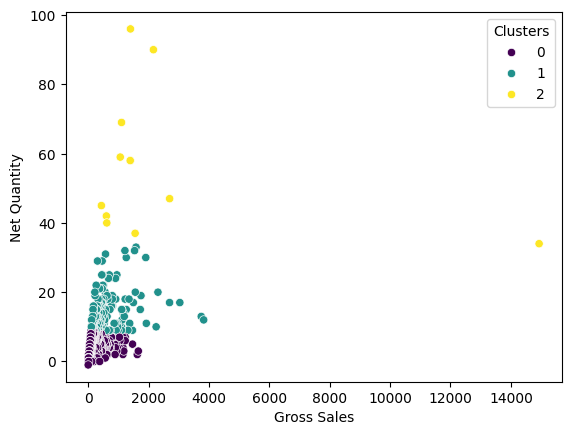

In [55]:
df['Clusters']=km.labels_
sns.scatterplot(x="Gross Sales",y="Net Quantity",hue = 'Clusters',  data=df,palette='viridis')

In [58]:
K=range(2,12)
wss = []

for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(df_scale)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

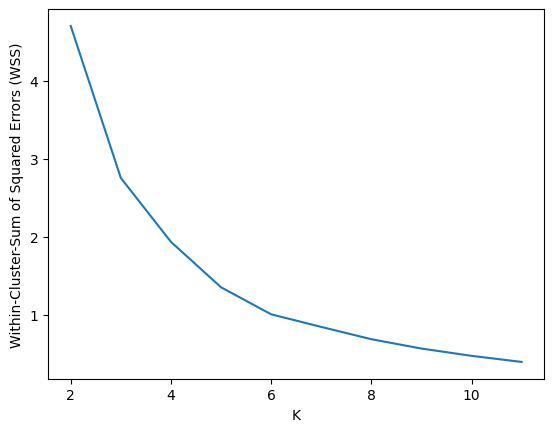

In [59]:
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

In [60]:
km=KMeans(n_clusters=5)
y_predicted = km.fit_predict(df_scale[['Gross Sales','Net Quantity']])
y_predicted


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 4, 4, ..., 0, 0, 0], dtype=int32)

<Axes: xlabel='Gross Sales', ylabel='Net Quantity'>

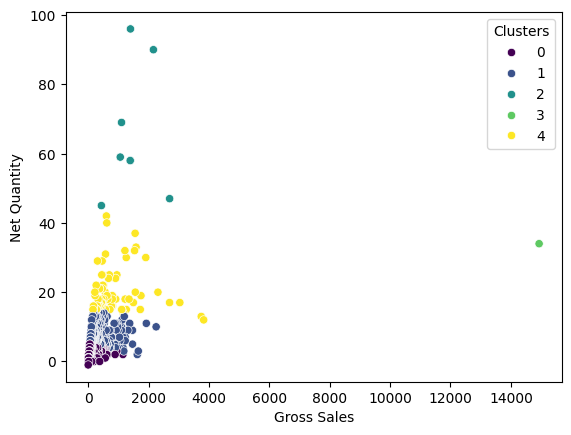

In [61]:
df['Clusters'] = km.labels_

sns.scatterplot(x="Gross Sales", y="Net Quantity",hue = 'Clusters',  data=df,palette='viridis')
